<a href="https://colab.research.google.com/github/Abishethvarman/FakeNewsDetection/blob/sentiment-analysis/V1.5.1_Sentiment_Analysis_VADER%2BBoW_FakeNews_20k_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

Sentiment Analysis on referencing this https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

DS used here is https://drive.google.com/file/d/1vdscq2CYrj2Gp4lH-JTplHGUq7lrJ6ts/view?usp=drive_link



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
import nltk
import gensim

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [3]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [4]:
df=pd.read_csv("fake-20000-SA.csv")

In [6]:
print(df.shape)

(20000, 7)


In [7]:
print(df['subject'].unique())

['News' 'politicsNews' 'worldnews' 'politics' 'left-news'
 'Government News' 'Middle-east' 'US_News']


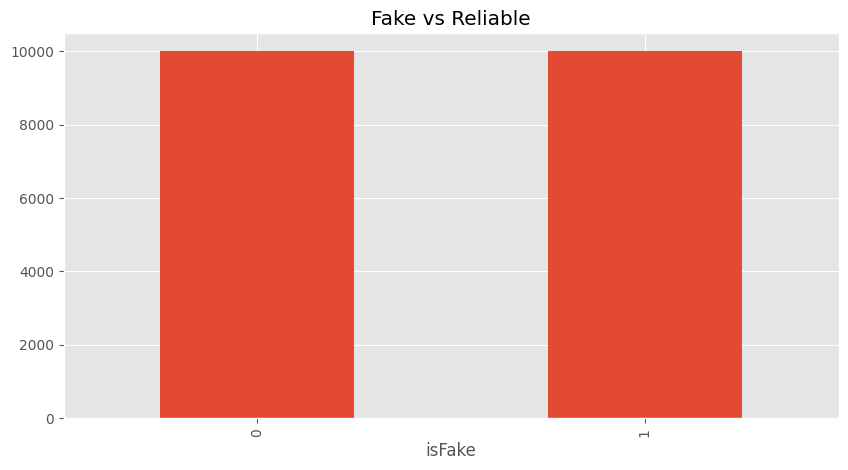

In [8]:
ax = df['isfake'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Fake vs Reliable',
          figsize=(10, 5))
ax.set_xlabel('isFake')
plt.show()

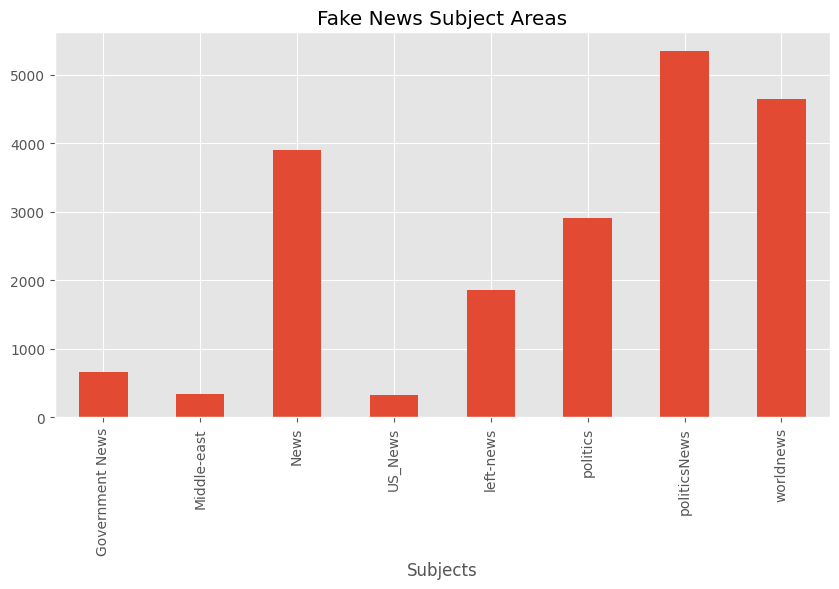

In [9]:
ax = df['subject'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Fake News Subject Areas',
          figsize=(10, 5))
ax.set_xlabel('Subjects')
plt.show()

In [10]:
df['original'] = df['title'] + ' ' + df['text']
df.head(3)

Unnamed: 0                                              title  \
0       10650   Trump Supporters Terrorize An American Woman ...   
1        2041  Trump adviser's Russia credentials come under ...   
2        8668  Turkey feels betrayed over EU accession but st...   

                                                text       subject  \
0  Donald Trump s deplorable supporters strike ag...          News   
1  MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   
2  LONDON (Reuters) - Turkey feels betrayed by so...     worldnews   

                  date  isfake label  \
0     December 3, 2016       1  fake   
1     August 24, 2016        0  real   
2  September 14, 2017        0  real   

                                            original  
0   Trump Supporters Terrorize An American Woman ...  
1  Trump adviser's Russia credentials come under ...  
2  Turkey feels betrayed over EU accession but st...

In [11]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'one', 'two', 'more','said','u','however','still','get','many','could'])

In [12]:
# Preprocessing
def preprocess(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() != 'mor']
    return ' '.join(filtered_words)

In [13]:
# Apply preprocessing
df['clean'] = df['original'].apply(preprocess)

In [14]:
df['clean'][5]

'AZ Cops Taser Veteran PTSD Heart Stops Beating ( VIDEO ) Cops America control , yet another case police department needs sued oblivion due excessive force . Kyle Cardenas Gilbert , Arizona veteran PTSD went harrowing tours duty Iraq . family says contacted VA Crisis Hotline due Kyle mental health emergency related PTSD . things went wrong.The Gilbert cops showed , scuffle . thing really awful family insisted wanted crisis team also hammered point home wanted cops . , cops violent cops got . filed official complaint , says , part : police charged bedroom attempted restrain Kyle . melee , officers Tased Kyle least seven times , sprayed OC spray directly Kyle face , struck Kyle multiple times batons , punched Kyle face closed fists , kicked kneed Kyle thighs legs , ordered K-9 unit dogs attack bite Kyle . beyond despicable , wait . Kyle immobilized hospital gurney , trigger happy cops used Taser , time heart stopped beating medical professionals restart it.Of course , despite , cops play

In [15]:
df['id'] = df.index + 1

In [16]:
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
sia = SentimentIntensityAnalyzer()

In [ ]:
# # Assuming 'df' is your DataFrame

# # Initialize the Vader Sentiment Intensity Analyzer
# vader_analyzer = SentimentIntensityAnalyzer()

# # Perform sentiment analysis using Vader
# df['vader_scores'] = df['clean'].apply(lambda x: vader_analyzer.polarity_scores(x))

# # Extract compound scores and assign sentiments
# df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])
# df['vader_sentiment_score'] = df['vader_compound'].apply(lambda x: 1 if x >= 0 else 0)

# # Print head of the DataFrame to inspect the results
# print(df[['clean', 'vader_compound', 'vader_sentiment_score']].head())


In [17]:
df['vader_scores'] = df['clean'].apply(lambda x: sia.polarity_scores(x))

In [18]:
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])

In [19]:
df['vader_sentiment'] = df['vader_compound'].apply(lambda x: 1 if x >= 0 else 0)

In [20]:
vectorizer = HashingVectorizer(n_features=5000, alternate_sign=False)
X = vectorizer.transform(df['clean'])

In [21]:
bow_df = pd.DataFrame(X.toarray())

In [23]:
bow_df

0     1         2     3     4         5     6     7     8     9     \
0       0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
1       0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
2       0.0   0.0  0.027217   0.0   0.0  0.027217   0.0   0.0   0.0   0.0   
3       0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
4       0.0   0.0  0.000000   0.0   0.0  0.045787   0.0   0.0   0.0   0.0   
...     ...   ...       ...   ...   ...       ...   ...   ...   ...   ...   
19995   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
19996   0.0   0.0  0.000000   0.0   0.0  0.075112   0.0   0.0   0.0   0.0   
19997   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
19998   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
19999   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   

       ...  4990  4991      4992      4993  4994  4995  4996      4997  4998  \
0      ...   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   0.0   
1      ...   0.0   0.0  0.000000  0.017935   0.0   0.0   0.0  0.017935   0.0   
2      ...   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   0.0   
3      ...   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   0.0   
4      ...   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   0.0   
...    ...   ...   ...       ...       ...   ...   ...   ...       ...   ...   
19995  ...   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   0.0   
19996  ...   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   0.0   
19997  ...   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.039193   0.0   
19998  ...   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   0.0   
19999  ...   0.0   0.0  0.013736  0.000000   0.0   0.0   0.0  0.000000   0.0   

       4999  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
19995   0.0  
19996   0.0  
19997   0.0  
19998   0.0  
19999   0.0  

[20000 rows x 5000 columns]

In [ ]:
# df = pd.concat([df, bow_df], axis=1)

In [25]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

res = {}
for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
    text = row['clean']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

train_vaders = pd.DataFrame(res).T
train_vaders = train_vaders.reset_index().rename(columns={'index': 'id'})
train_vaders = train_vaders.merge(train_df, how='left')
train_vaders['sentiment'] = train_vaders['vader_compound'].apply(lambda x: 1 if x >= 0 else 0)

  0%|          | 0/16000 [00:00<?, ?it/s]

In [26]:
df.shape

(20000, 13)

In [27]:
df.head()

Unnamed: 0                                              title  \
0       10650   Trump Supporters Terrorize An American Woman ...   
1        2041  Trump adviser's Russia credentials come under ...   
2        8668  Turkey feels betrayed over EU accession but st...   
3        1114  China newspapers say call with Taiwan's Tsai s...   
4       13902   Sean Hannity Just Openly Threatened Someone O...   

                                                text       subject  \
0  Donald Trump s deplorable supporters strike ag...          News   
1  MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   
2  LONDON (Reuters) - Turkey feels betrayed by so...     worldnews   
3  SHANGHAI (Reuters) - Chinese state media on Mo...  politicsNews   
4  Is there some reason people like Donald Trump ...          News   

                  date  isfake label  \
0     December 3, 2016       1  fake   
1     August 24, 2016        0  real   
2  September 14, 2017        0  real   
3    December 5, 2016        0  real   
4       April 30, 2017       1  fake   

                                            original  \
0   Trump Supporters Terrorize An American Woman ...   
1  Trump adviser's Russia credentials come under ...   
2  Turkey feels betrayed over EU accession but st...   
3  China newspapers say call with Taiwan's Tsai s...   
4   Sean Hannity Just Openly Threatened Someone O...   

                                               clean  id  \
0  Trump Supporters Terrorize American Woman Subw...   1   
1  Trump adviser 's Russia credentials come scrut...   2   
2  Turkey feels betrayed EU accession wants join ...   3   
3  China newspapers say call Taiwan 's Tsai shows...   4   
4  Sean Hannity Openly Threatened Someone Twitter...   5   

                                        vader_scores  vader_compound  \
0  {'neg': 0.294, 'neu': 0.572, 'pos': 0.134, 'co...         -0.9961   
1  {'neg': 0.054, 'neu': 0.848, 'pos': 0.098, 'co...          0.9797   
2  {'neg': 0.147, 'neu': 0.707, 'pos': 0.146, 'co...         -0.8658   
3  {'neg': 0.1, 'neu': 0.814, 'pos': 0.086, 'comp...         -0.4570   
4  {'neg': 0.16, 'neu': 0.739, 'pos': 0.101, 'com...         -0.9601   

   vader_sentiment  
0                0  
1                1  
2                0  
3                0  
4                0

In [29]:
train_df.shape

(16000, 13)

In [35]:
res = {}
for i, row in tqdm(test_df.iterrows(), total=len(test_df)):
    text = row['clean']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

test_vaders = pd.DataFrame(res).T
test_vaders = test_vaders.reset_index().rename(columns={'index': 'id'})
test_vaders = test_vaders.merge(test_df, how='left')
test_vaders['sentiment'] = test_vaders['vader_compound'].apply(lambda x: 1 if x >= 0 else 0)


  0%|          | 0/4000 [00:00<?, ?it/s]

In [31]:
df.loc[df.index.isin(test_df.index), 'vader_scores'] = test_df['clean'].apply(lambda x: sia.polarity_scores(x))
df.loc[df.index.isin(test_df.index), 'vader_compound'] = df.loc[df.index.isin(test_df.index), 'vader_scores'].apply(lambda x: x['compound'])
df.loc[df.index.isin(test_df.index), 'vader_sentiment'] = df.loc[df.index.isin(test_df.index), 'vader_compound'].apply(lambda x: 1 if x >= 0 else 0)

In [33]:
df.head()

Unnamed: 0                                              title  \
0       10650   Trump Supporters Terrorize An American Woman ...   
1        2041  Trump adviser's Russia credentials come under ...   
2        8668  Turkey feels betrayed over EU accession but st...   
3        1114  China newspapers say call with Taiwan's Tsai s...   
4       13902   Sean Hannity Just Openly Threatened Someone O...   

                                                text       subject  \
0  Donald Trump s deplorable supporters strike ag...          News   
1  MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   
2  LONDON (Reuters) - Turkey feels betrayed by so...     worldnews   
3  SHANGHAI (Reuters) - Chinese state media on Mo...  politicsNews   
4  Is there some reason people like Donald Trump ...          News   

                  date  isfake label  \
0     December 3, 2016       1  fake   
1     August 24, 2016        0  real   
2  September 14, 2017        0  real   
3    December 5, 2016        0  real   
4       April 30, 2017       1  fake   

                                            original  \
0   Trump Supporters Terrorize An American Woman ...   
1  Trump adviser's Russia credentials come under ...   
2  Turkey feels betrayed over EU accession but st...   
3  China newspapers say call with Taiwan's Tsai s...   
4   Sean Hannity Just Openly Threatened Someone O...   

                                               clean  id  \
0  Trump Supporters Terrorize American Woman Subw...   1   
1  Trump adviser 's Russia credentials come scrut...   2   
2  Turkey feels betrayed EU accession wants join ...   3   
3  China newspapers say call Taiwan 's Tsai shows...   4   
4  Sean Hannity Openly Threatened Someone Twitter...   5   

                                        vader_scores  vader_compound  \
0  {'neg': 0.294, 'neu': 0.572, 'pos': 0.134, 'co...         -0.9961   
1  {'neg': 0.054, 'neu': 0.848, 'pos': 0.098, 'co...          0.9797   
2  {'neg': 0.147, 'neu': 0.707, 'pos': 0.146, 'co...         -0.8658   
3  {'neg': 0.1, 'neu': 0.814, 'pos': 0.086, 'comp...         -0.4570   
4  {'neg': 0.16, 'neu': 0.739, 'pos': 0.101, 'com...         -0.9601   

   vader_sentiment  
0                0  
1                1  
2                0  
3                0  
4                0

In [93]:
negative_threshold = -0.25
positive_threshold = 0.25

df['sentiment_on_adjusted_vader'] = pd.cut(
    df['vader_compound'],
    bins=[float('-inf'), negative_threshold, positive_threshold, float('inf')],
    labels=['negative', 'neutral', 'positive'],
    include_lowest=True
)

# Display the updated DataFrame
print(df.head(2))


   Unnamed: 0                                              title  \
0       10650   Trump Supporters Terrorize An American Woman ...   
1        2041  Trump adviser's Russia credentials come under ...   

                                                text       subject  \
0  Donald Trump s deplorable supporters strike ag...          News   
1  MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   

               date  isfake label  \
0  December 3, 2016       1  fake   
1  August 24, 2016        0  real   

                                            original  \
0   Trump Supporters Terrorize An American Woman ...   
1  Trump adviser's Russia credentials come under ...   

                                               clean  id  \
0  Trump Supporters Terrorize American Woman Subw...   1   
1  Trump adviser 's Russia credentials come scrut...   2   

                                        vader_scores  vader_compound  \
0  {'neg': 0.294, 'neu': 0.572, 'pos': 0.134, 'co.

In [94]:
df.head(2)

Unnamed: 0                                              title  \
0       10650   Trump Supporters Terrorize An American Woman ...   
1        2041  Trump adviser's Russia credentials come under ...   

                                                text       subject  \
0  Donald Trump s deplorable supporters strike ag...          News   
1  MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   

               date  isfake label  \
0  December 3, 2016       1  fake   
1  August 24, 2016        0  real   

                                            original  \
0   Trump Supporters Terrorize An American Woman ...   
1  Trump adviser's Russia credentials come under ...   

                                               clean  id  \
0  Trump Supporters Terrorize American Woman Subw...   1   
1  Trump adviser 's Russia credentials come scrut...   2   

                                        vader_scores  vader_compound  \
0  {'neg': 0.294, 'neu': 0.572, 'pos': 0.134, 'co...         -0.9961   
1  {'neg': 0.054, 'neu': 0.848, 'pos': 0.098, 'co...          0.9797   

   vader_sentiment sentiment_on_adjusted_vader  \
0                0                    negative   
1                1                    positive   

  sentiment_on_adjusted_vader_label  
0                                 0  
1                                 1

In [95]:
df['sentiment_on_adjusted_vader_label'] = df['sentiment_on_adjusted_vader'].map({'positive': 1, 'neutral': -1, 'negative': 0})

In [96]:
df.head(2)

Unnamed: 0                                              title  \
0       10650   Trump Supporters Terrorize An American Woman ...   
1        2041  Trump adviser's Russia credentials come under ...   

                                                text       subject  \
0  Donald Trump s deplorable supporters strike ag...          News   
1  MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   

               date  isfake label  \
0  December 3, 2016       1  fake   
1  August 24, 2016        0  real   

                                            original  \
0   Trump Supporters Terrorize An American Woman ...   
1  Trump adviser's Russia credentials come under ...   

                                               clean  id  \
0  Trump Supporters Terrorize American Woman Subw...   1   
1  Trump adviser 's Russia credentials come scrut...   2   

                                        vader_scores  vader_compound  \
0  {'neg': 0.294, 'neu': 0.572, 'pos': 0.134, 'co...         -0.9961   
1  {'neg': 0.054, 'neu': 0.848, 'pos': 0.098, 'co...          0.9797   

   vader_sentiment sentiment_on_adjusted_vader  \
0                0                    negative   
1                1                    positive   

  sentiment_on_adjusted_vader_label  
0                                 0  
1                                 1

In [97]:
accuracy = accuracy_score(df['sentiment_on_adjusted_vader_label'], df['vader_sentiment'])
precision = precision_score(df['sentiment_on_adjusted_vader_label'], df['vader_sentiment'],average='micro')
recall = recall_score(df['sentiment_on_adjusted_vader_label'], df['vader_sentiment'],average='micro')
f1 = f1_score(df['sentiment_on_adjusted_vader_label'], df['vader_sentiment'],average='micro')
conf_matrix = confusion_matrix(df['sentiment_on_adjusted_vader_label'], df['vader_sentiment'])

print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.94250
Precision: 0.94250
Recall: 0.94250
F1 Score: 0.94250
Confusion Matrix:
[[   0  434  716]
 [   0 9357    0]
 [   0    0 9493]]


In [ ]:
df = df.applymap(lambda x: ''.join(filter(str.isalpha, str(x))))
df.head(5)

In [47]:
df.shape

(20000, 5013)

In [98]:
df

Unnamed: 0                                              title  \
0           10650   Trump Supporters Terrorize An American Woman ...   
1            2041  Trump adviser's Russia credentials come under ...   
2            8668  Turkey feels betrayed over EU accession but st...   
3            1114  China newspapers say call with Taiwan's Tsai s...   
4           13902   Sean Hannity Just Openly Threatened Someone O...   
...           ...                                                ...   
19995       11284  RUSSIAN AMBASSADOR Visited Obama 6 Times Durin...   
19996       11964   MAJOR Ad Vendor Bans Breitbart For Hate Speec...   
19997        5390  Jordan begins diplomatic offensive ahead of Tr...   
19998         860  U.S.-Russia tensions over Syria will not 'spir...   
19999       15795  Insider Firm ‘FlashPoint’ tied to Orlando Shoo...   

                                                    text       subject  \
0      Donald Trump s deplorable supporters strike ag...          News   
1      MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   
2      LONDON (Reuters) - Turkey feels betrayed by so...     worldnews   
3      SHANGHAI (Reuters) - Chinese state media on Mo...  politicsNews   
4      Is there some reason people like Donald Trump ...          News   
...                                                  ...           ...   
19995  FLASHBACK: HILLARY CLINTON S STATE DEPARTMENT ...      politics   
19996  You know how Donald Trump has been trying to c...          News   
19997  AMMAN (Reuters) - Jordan has begun consultatio...     worldnews   
19998  WASHINGTON (Reuters) - Tensions between the Un...  politicsNews   
19999  Shawn Helton  21st Century WireIn the wake of ...   Middle-east   

                      date  isfake label  \
0         December 3, 2016       1  fake   
1         August 24, 2016        0  real   
2      September 14, 2017        0  real   
3        December 5, 2016        0  real   
4           April 30, 2017       1  fake   
...                    ...     ...   ...   
19995          Mar 3, 2017       1  fake   
19996    November 22, 2016       1  fake   
19997    December 3, 2017        0  real   
19998      April 11, 2017        0  real   
19999     October 25, 2016       1  fake   

                                                original  \
0       Trump Supporters Terrorize An American Woman ...   
1      Trump adviser's Russia credentials come under ...   
2      Turkey feels betrayed over EU accession but st...   
3      China newspapers say call with Taiwan's Tsai s...   
4       Sean Hannity Just Openly Threatened Someone O...   
...                                                  ...   
19995  RUSSIAN AMBASSADOR Visited Obama 6 Times Durin...   
19996   MAJOR Ad Vendor Bans Breitbart For Hate Speec...   
19997  Jordan begins diplomatic offensive ahead of Tr...   
19998  U.S.-Russia tensions over Syria will not 'spir...   
19999  Insider Firm ‘FlashPoint’ tied to Orlando Shoo...   

                                                   clean     id  \
0      Trump Supporters Terrorize American Woman Subw...      1   
1      Trump adviser 's Russia credentials come scrut...      2   
2      Turkey feels betrayed EU accession wants join ...      3   
3      China newspapers say call Taiwan 's Tsai shows...      4   
4      Sean Hannity Openly Threatened Someone Twitter...      5   
...                                                  ...    ...   
19995  RUSSIAN AMBASSADOR Visited Obama 6 Times Hilla...  19996   
19996  MAJOR Ad Vendor Bans Breitbart Hate Speech , T...  19997   
19997  Jordan begins diplomatic offensive ahead Trump...  19998   
19998  U.S.-Russia tensions Syria 'spiral control ' :...  19999   
19999  Insider Firm ‘ FlashPoint ’ tied Orlando Shoot...  20000   

                                            vader_scores  vader_compound  \
0      {'neg': 0.294, 'neu': 0.572, 'pos': 0.134, 'co...         -0.9961   
1      {'neg': 0.054, 'neu': 0.848, 'pos': 0.0

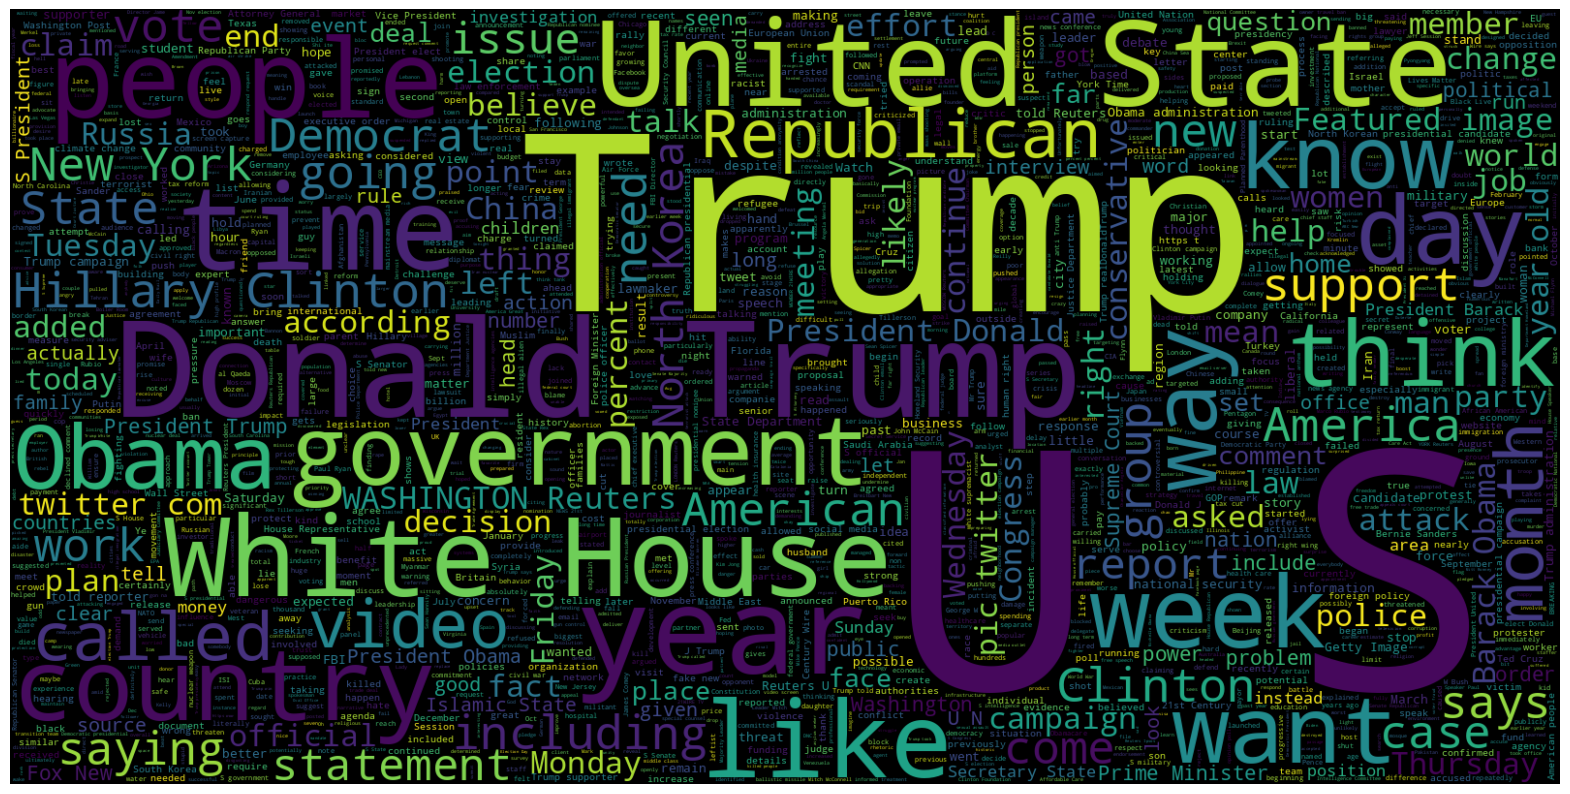

In [100]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(df['clean']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

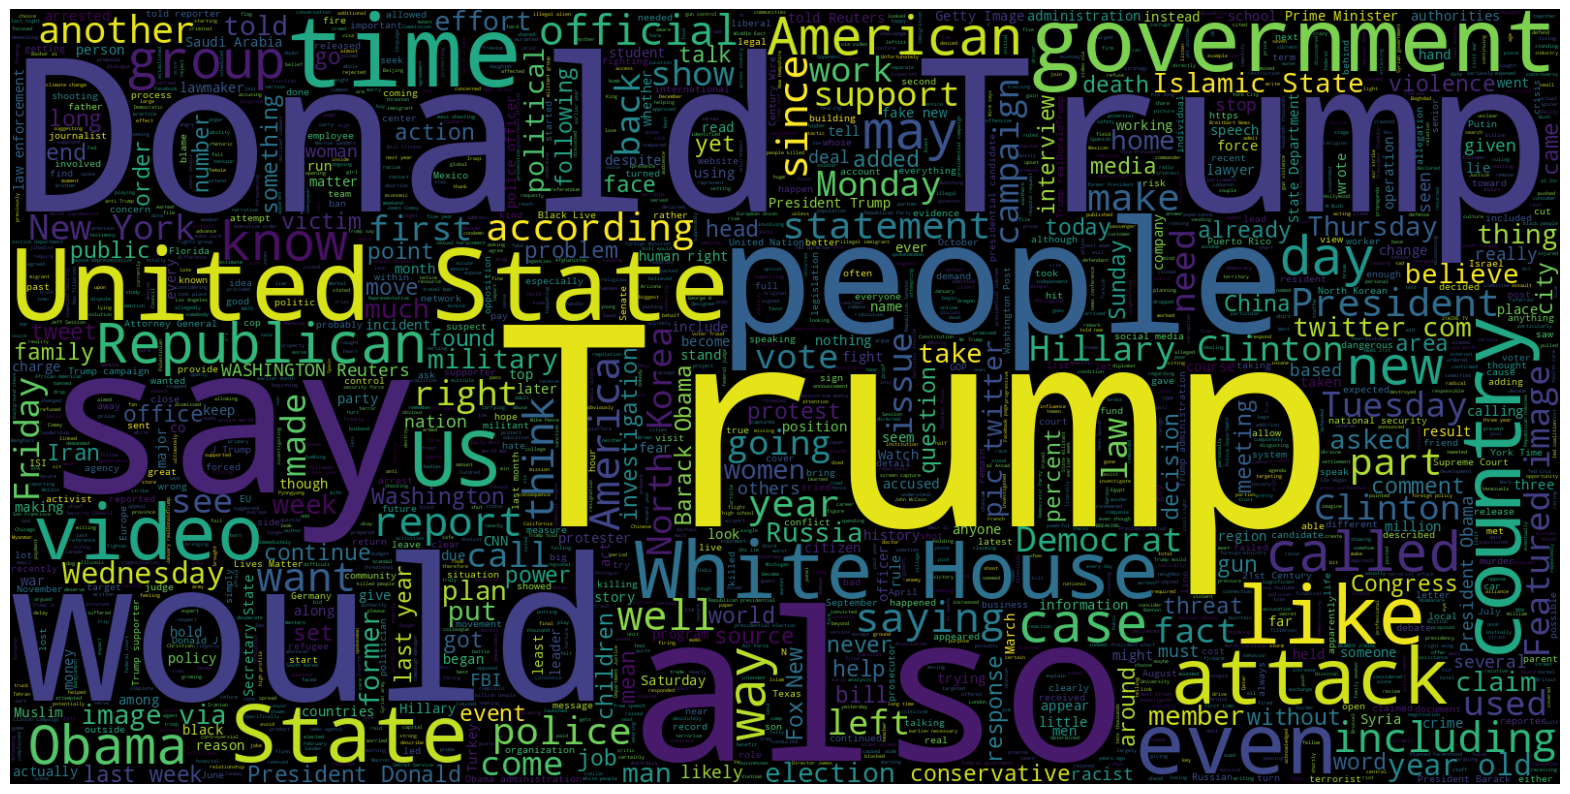

In [102]:
#negative sentiment
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.vader_sentiment == 0].clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

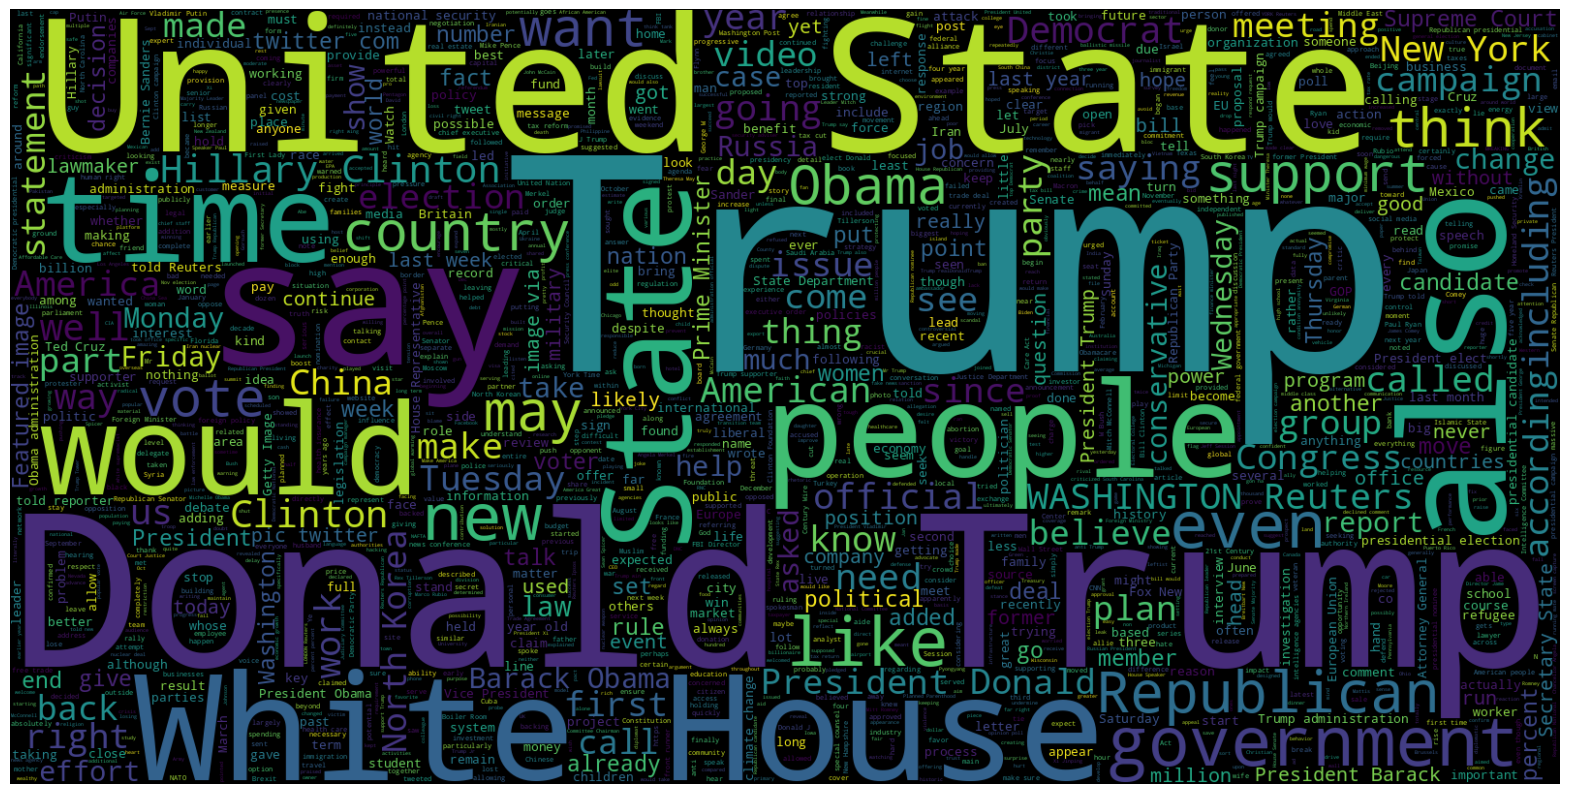

In [103]:
#positive sentiment
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.vader_sentiment == 1].clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

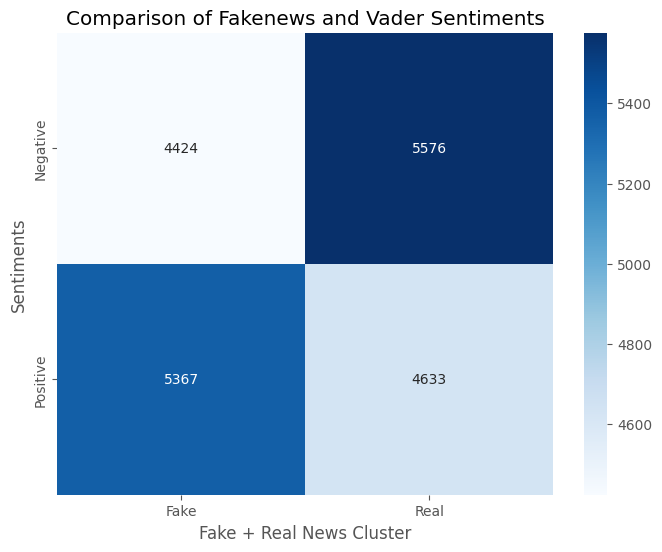

In [101]:
FakeOrNot = df['isfake']
PosOrNeg = df['vader_sentiment']
conf_matrix = confusion_matrix(FakeOrNot, PosOrNeg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Fake + Real News Cluster')
plt.ylabel('Sentiments')
plt.title('Comparison of Fakenews and Vader Sentiments')
plt.show()

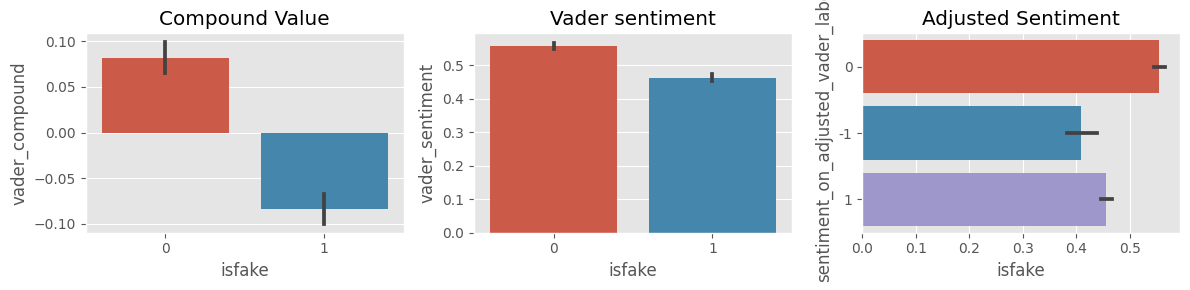

In [105]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='isfake', y='vader_compound', ax=axs[0])
sns.barplot(data=df, x='isfake', y='vader_sentiment', ax=axs[1])
sns.barplot(data=df, x='isfake', y='sentiment_on_adjusted_vader_label', ax=axs[2])
axs[0].set_title('Compound Value')
axs[1].set_title('Vader sentiment')
axs[2].set_title('Adjusted Sentiment')
plt.tight_layout()
plt.show()

In [110]:
df[['neg', 'neu', 'pos','compound']] = df['vader_scores'].apply(pd.Series)

In [111]:
df.head(2)

Unnamed: 0                                              title  \
0       10650   Trump Supporters Terrorize An American Woman ...   
1        2041  Trump adviser's Russia credentials come under ...   

                                                text       subject  \
0  Donald Trump s deplorable supporters strike ag...          News   
1  MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   

               date  isfake label  \
0  December 3, 2016       1  fake   
1  August 24, 2016        0  real   

                                            original  \
0   Trump Supporters Terrorize An American Woman ...   
1  Trump adviser's Russia credentials come under ...   

                                               clean  id  \
0  Trump Supporters Terrorize American Woman Subw...   1   
1  Trump adviser 's Russia credentials come scrut...   2   

                                        vader_scores  vader_compound  \
0  {'neg': 0.294, 'neu': 0.572, 'pos': 0.134, 'co...         -0.9961   
1  {'neg': 0.054, 'neu': 0.848, 'pos': 0.098, 'co...          0.9797   

   vader_sentiment sentiment_on_adjusted_vader  \
0                0                    negative   
1                1                    positive   

  sentiment_on_adjusted_vader_label    neg    neu    pos  compound  
0                                 0  0.294  0.572  0.134   -0.9961  
1                                 1  0.054  0.848  0.098    0.9797

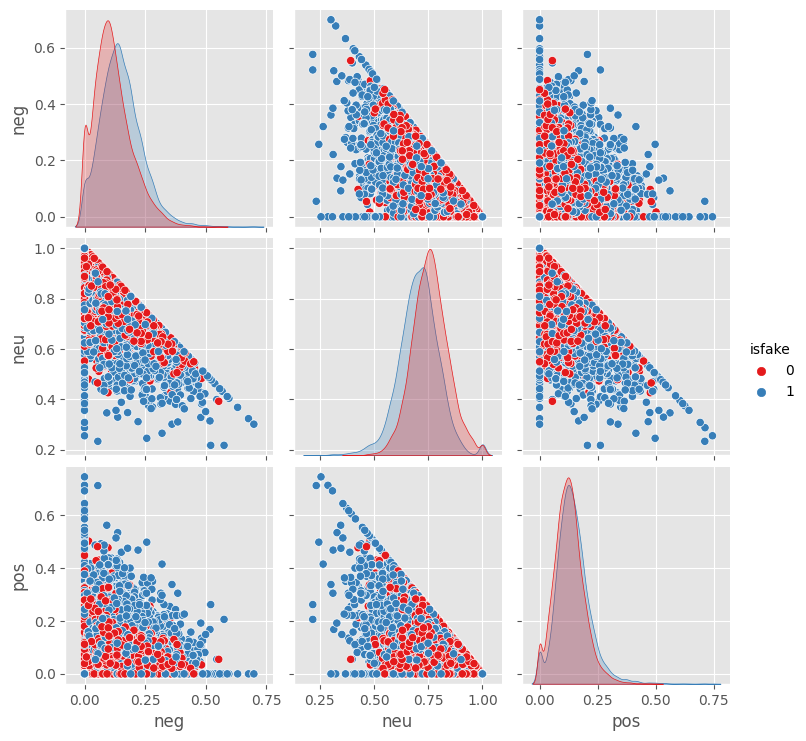

In [112]:
sns.pairplot(data=df, vars=['neg', 'neu', 'pos'], hue='isfake', palette='Set1')
plt.show()

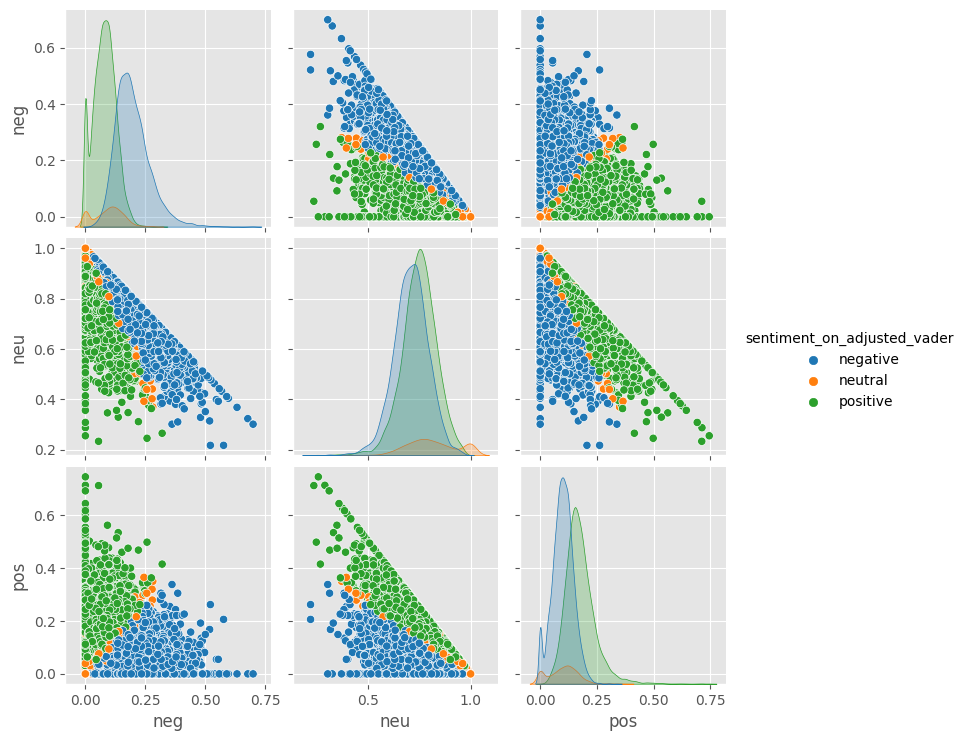

In [115]:
sns.pairplot(data=df,
             vars=['neg', 'neu', 'pos'],
            hue='sentiment_on_adjusted_vader',
            palette='tab10')
plt.show()

In [116]:
df.to_csv('fake-20000-SA-VADER.csv', index=False)